In [1]:
#test the avrage funding ratio of country among collaboration pair

In [1]:
import pandas as pd
import numpy as np
from itertools import product
from ast import literal_eval

In [2]:
pubs_author_funder = pd.read_csv("..//..//data//dropbox//Data//DerivedData//CleanedRawData//pubs_author_funder.csv")
pubs_author_funder['author_country'] = pubs_author_funder['author_country'].apply(literal_eval)
pubs_author_funder['funder_country'] = pubs_author_funder['funder_country'].apply(
    lambda x: literal_eval(x) if pd.notnull(x) else "Not-Funded")
pubs_author_funder.head()

/home/miaoli/conda/envs/funding/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3165: DtypeWarning: Columns (2) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


,id,author_country,funder_country,discipline,year,rel_citation,citation
0,30507292,[Turkey],[Turkey],77,2009,0.485,6
1,30574690,"[United States, France]","[United States, United States, United States, ...",83,2009,0.703,9
2,30574691,[Russia],[Russia],83,2009,0.312,4
3,30585095,"[Spain, Spain]","[Spain, Spain, Spain, Spain, Spain, Spain]",89,2009,0.137,1
4,30585097,"[Germany, Spain]",[Spain],89,2009,0.410,3


In [3]:
pubs_author_funder['author_disct']=pubs_author_funder['author_country'].apply(lambda x:list(set(x)))
pubs_author_funder['coll']=pubs_author_funder['author_disct'].apply(
    lambda x:1 if len(x)>1 else 0)
author_df=pubs_author_funder.explode('author_disct')
author_df.head()

,id,author_country,funder_country,discipline,year,rel_citation,citation,author_disct,coll
0,30507292,[Turkey],[Turkey],77,2009,0.485,6,Turkey,0
1,30574690,"[United States, France]","[United States, United States, United States, ...",83,2009,0.703,9,United States,1
1,30574690,"[United States, France]","[United States, United States, United States, ...",83,2009,0.703,9,France,1
2,30574691,[Russia],[Russia],83,2009,0.312,4,Russia,0
3,30585095,"[Spain, Spain]","[Spain, Spain, Spain, Spain, Spain, Spain]",89,2009,0.137,1,Spain,0


In [4]:
cntry_cnt=author_df.groupby('author_disct').size().reset_index(name='count')
top10=cntry_cnt.sort_values(by='count',ascending=False).head(10)['author_disct'].values
top10

array(['United States', 'China', 'Germany', 'United Kingdom', 'Japan',
       'France', 'Italy', 'India', 'Canada', 'South Korea'], dtype=object)

In [5]:
top10_df=author_df[(author_df.author_disct.isin(top10))&(author_df.coll==1)]
top10_df.head()

,id,author_country,funder_country,discipline,year,rel_citation,citation,author_disct,coll
1,30574690,"[United States, France]","[United States, United States, United States, ...",83,2009,0.703,9,United States,1
1,30574690,"[United States, France]","[United States, United States, United States, ...",83,2009,0.703,9,France,1
4,30585097,"[Germany, Spain]",[Spain],89,2009,0.410,3,Germany,1
7,30585103,"[United Kingdom, Ireland, United Kingdom]",[Ireland],89,2009,0.957,7,United Kingdom,1
9,30585105,"[Canada, United States]",[Canada],89,2009,0.000,0,United States,1


In [6]:
def type(funderlist,author_cntry):
    funderlist=list(set(funderlist))
    label='others'
    
    if len(funderlist)>1:
        if author_cntry in funderlist:
            label='cofund'
    else:
        if author_cntry in funderlist:
            label='single'
    return label
top10_df['type']=top10_df.apply(lambda x:type(x['funder_country'],x['author_disct']),axis=1)

<ipython-input-6-7a9a940d1130>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  top10_df['type']=top10_df.apply(lambda x:type(x['funder_country'],x['author_disct']),axis=1)


In [7]:
cntry_cnt = top10_df.groupby(['author_disct','type']).size().reset_index(name='count')
cntry_cnt=cntry_cnt.pivot_table(index='author_disct',columns='type',values='count')
cntry_cnt = cntry_cnt.div(cntry_cnt.sum(axis=1), axis=0)
cntry_cnt=cntry_cnt.reindex(top10)
cntry_cnt=pd.melt(cntry_cnt,var_name='type',value_name='ratio',ignore_index=False)
cntry_cnt.head()

,type,ratio
author_disct,,
United States,cofund,0.268327
China,cofund,0.265371
Germany,cofund,0.241716
United Kingdom,cofund,0.236072
Japan,cofund,0.215155


In [10]:
cntry_cnt=cntry_cnt.reset_index()

In [16]:
cntry_cnt=cntry_cnt[cntry_cnt.type!='others']

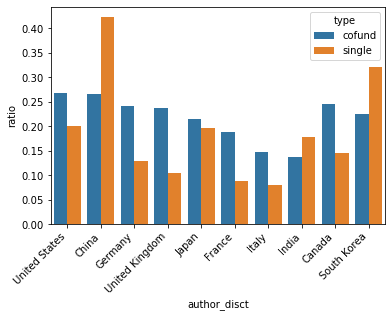

In [23]:
sns.barplot(x='author_disct',y='ratio',hue="type",data=cntry_cnt)
plt.xticks(rotation="45",ha='right')
plt.savefig("collaboration.png",bbox_inches="tight")

In [19]:
import matplotlib.pyplot as plt